#Step 1: Data Preprocessing
1.1 Load and Explore the Data
First, we’ll load the dataset, check for missing values, and explore the basic structure.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/insurance_dataset.csv')

# Check the basic structure of the dataset
print(df.head())
print(df.info())
print(df.describe())

          ID  KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL  \
0   63581743         0  60.0         0  11.0  $67,349      No        $0   
1  132761049         0  43.0         0  11.0  $91,449      No  $257,252   
2  921317019         0  48.0         0  11.0  $52,881      No        $0   
3  727598473         0  35.0         1  10.0  $16,039      No  $124,191   
4  450221861         0  51.0         0  14.0      NaN      No  $306,251   

  MSTATUS GENDER  ... TIF CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  REVOKED  \
0    z_No      M  ...  11  Minivan      yes   $4,461        2       No   
1    z_No      M  ...   1  Minivan      yes       $0        0       No   
2    z_No      M  ...   1      Van      yes       $0        0       No   
3     Yes    z_F  ...   4    z_SUV       no  $38,690        2       No   
4     Yes      M  ...   7  Minivan      yes       $0        0       No   

  MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0       3      $0    18.0           0  
1       0      $0     1.

In [4]:
# Check for missing values
print(df.isnull().sum())

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64


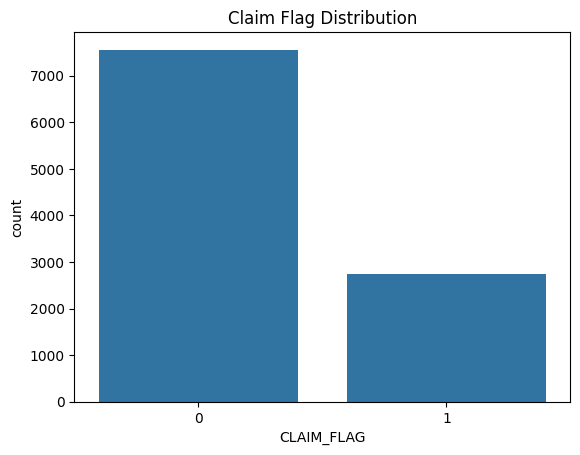

In [5]:
# Visualize the distribution of the target variable (CLAIM_FLAG)
sns.countplot(x='CLAIM_FLAG', data=df)
plt.title('Claim Flag Distribution')
plt.show()

##1.2 Handle Missing Values and Outliers
Let’s fill in missing values and handle any potential outliers.

In [6]:
# Handle missing values

# List of columns that might contain dollar signs or commas and need cleaning
columns_to_clean = ['INCOME', 'HOME_VAL', 'CLM_AMT', 'BLUEBOOK', 'OLDCLAIM']

# Remove dollar signs and commas from relevant columns and convert to float
for col in columns_to_clean:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the columns were successfully converted to numeric types
print(df[columns_to_clean].dtypes)

# Fill 'AGE' missing values with the median
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Fill 'YOJ' missing values with the median
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)

# Fill 'INCOME' missing values with the median
df['INCOME'].fillna(df['INCOME'].median(), inplace=True)

# Fill 'HOME_VAL' missing values with the median
df['HOME_VAL'].fillna(df['HOME_VAL'].median(), inplace=True)

# Fill 'OCCUPATION' missing values with "Unknown" (a new category)
df['OCCUPATION'].fillna("Unknown", inplace=True)

# Fill 'CAR_AGE' missing values with the median
df['CAR_AGE'].fillna(df['CAR_AGE'].median(), inplace=True)

# Check if all missing values have been handled
print(df.isnull().sum())

INCOME      float64
HOME_VAL    float64
CLM_AMT     float64
BLUEBOOK    float64
OLDCLAIM    float64
dtype: object
ID            0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
dtype: int64


##Encoding and Scaling

In [7]:
# List of categorical columns to encode
categorical_cols = ['GENDER', 'MSTATUS', 'CAR_TYPE', 'RED_CAR', 'PARENT1', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'REVOKED']

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check if the encoding was successful
print(df[categorical_cols].head())

   GENDER  MSTATUS  CAR_TYPE  RED_CAR  PARENT1  EDUCATION  OCCUPATION  \
0       0        1         0        1        0          3           5   
1       0        1         0        1        0          4           8   
2       0        1         4        1        0          1           4   
3       1        0         5        0        0          4           0   
4       0        0         0        1        0          0           8   

   CAR_USE  REVOKED  
0        1        0  
1        0        0  
2        1        0  
3        1        0  
4        1        0  


In [8]:

# List of numerical columns to scale
numerical_cols = ['AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
                  'BLUEBOOK', 'CAR_AGE', 'MVR_PTS', 'CLM_AMT', 'OLDCLAIM', 'CLM_FREQ']

# Scale numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the cleaned dataset
print(df.head())

          ID  KIDSDRIV       AGE  HOMEKIDS       YOJ    INCOME  PARENT1  \
0   63581743         0  1.762444 -0.645402  0.124500  0.134791        0   
1  132761049         0 -0.213587 -0.645402  0.124500  0.656889        0   
2  921317019         0  0.367599 -0.645402  0.124500 -0.178641        0   
3  727598473         0 -1.143484  0.250439 -0.125519 -0.976780        0   
4  450221861         0  0.716310 -0.645402  0.874556 -0.164603        0   

   HOME_VAL  MSTATUS  GENDER  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0 -1.233666        1       0  ...   11         0        1  0.048899  1.039219   
1  0.815614        1       0  ...    1         0        1 -0.461938 -0.693850   
2 -1.233666        1       0  ...    1         4        1 -0.461938 -0.693850   
3 -0.244355        0       1  ...    4         5        0  3.968526  1.039219   
4  1.205943        0       0  ...    7         0        1 -0.461938 -0.693850   

   REVOKED   MVR_PTS   CLM_AMT   CAR_AGE  CLAIM_FLAG  
0      

In [25]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,cluster
0,63581743,0,1.762444,-0.645402,0.124500,0.134791,0,-1.233666,1,0,...,0,1,0.048899,1.039219,0,0.597453,-0.319843,1.756297,0,2
1,132761049,0,-0.213587,-0.645402,0.124500,0.656889,0,0.815614,1,0,...,0,1,-0.461938,-0.693850,0,-0.792137,-0.319843,-1.315306,0,0
2,921317019,0,0.367599,-0.645402,0.124500,-0.178641,0,-1.233666,1,0,...,4,1,-0.461938,-0.693850,0,0.134256,-0.319843,0.310836,0,2
3,727598473,0,-1.143484,0.250439,-0.125519,-0.976780,0,-0.244355,0,1,...,5,0,3.968526,1.039219,0,0.597453,-0.319843,0.310836,0,0
4,450221861,0,0.716310,-0.645402,0.874556,-0.164603,0,1.205943,0,0,...,0,1,-0.461938,-0.693850,0,-0.792137,-0.319843,-0.411894,0,0


##Splitting the Data for Modeling

In [9]:
# Define features (X) and target (y) for risk prediction (CLAIM_FLAG)
X_risk = df.drop(columns=['CLAIM_FLAG', 'ID'])
y_risk = df['CLAIM_FLAG']

# Split the data for risk prediction
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

# Define features and target for pricing prediction (CLM_AMT)
X_pricing = df.drop(columns=['CLM_AMT', 'ID'])
y_pricing = df['CLM_AMT']

# Split the data for pricing model
X_train_pricing, X_test_pricing, y_train_pricing, y_test_pricing = train_test_split(X_pricing, y_pricing, test_size=0.2, random_state=42)

#Model Building

## Risk Prediction Model

In [10]:
# 5.1: Risk Prediction Model (Random Forest)

# Initialize and fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_risk, y_train_risk)

# Predict on the test data
y_pred_risk = rf_model.predict(X_test_risk)

# Evaluate the model
print("Risk Prediction Model:")
print(confusion_matrix(y_test_risk, y_pred_risk))
print(classification_report(y_test_risk, y_pred_risk))

Risk Prediction Model:
[[1506    0]
 [   0  555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



##Cross-Validation

In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_risk, y_risk, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         0.99951456 0.99951456]
Mean CV Score: 0.9998058252427185


* The cross-validation results show that the model maintains near-perfect
accuracy across all folds.
* Mean CV Score: 0.9998, which is very high and suggests the model is consistently predicting the risk of claims very well.

#### We will remove the CLM_AMT feature (which is highly correlated with CLAIM_FLAG) and check if the model's performance drops. This will help us identify if there is potential data leakage.

In [12]:
# Remove CLM_AMT from the features
X_risk_cleaned = df.drop(columns=['CLAIM_FLAG', 'ID', 'CLM_AMT'])

# Split the cleaned data for risk prediction
X_train_risk_cleaned, X_test_risk_cleaned, y_train_risk_cleaned, y_test_risk_cleaned = train_test_split(
    X_risk_cleaned, y_risk, test_size=0.2, random_state=42)

# Retrain the Random Forest Classifier without CLM_AMT
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_risk_cleaned, y_train_risk_cleaned)

# Predict on the cleaned test data
y_pred_risk_cleaned = rf_model_cleaned.predict(X_test_risk_cleaned)

# Evaluate the model
print("Risk Prediction Model (Without CLM_AMT):")
print(confusion_matrix(y_test_risk_cleaned, y_pred_risk_cleaned))
print(classification_report(y_test_risk_cleaned, y_pred_risk_cleaned))

# Cross-validation with the cleaned dataset
cv_scores_cleaned = cross_val_score(rf_model_cleaned, X_risk_cleaned, y_risk, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Without CLM_AMT):", cv_scores_cleaned)
print("Mean CV Score (Without CLM_AMT):", np.mean(cv_scores_cleaned))

Risk Prediction Model (Without CLM_AMT):
[[1428   78]
 [ 373  182]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1506
           1       0.70      0.33      0.45       555

    accuracy                           0.78      2061
   macro avg       0.75      0.64      0.66      2061
weighted avg       0.77      0.78      0.75      2061

Cross-Validation Scores (Without CLM_AMT): [0.77583697 0.77680738 0.76941748 0.77718447 0.76359223]
Mean CV Score (Without CLM_AMT): 0.772567704432291


#### Risk Prediction Model (Without CLM_AMT):
* Accuracy dropped to 0.78: After removing the CLM_AMT feature, the performance dropped from near-perfect accuracy to a more realistic score, suggesting that CLM_AMT was causing data leakage.
* Cross-Validation Mean Score: 0.7725, which is a significant drop from the earlier score of around 0.999. This indicates that the model is now more generalizable and not overfitting due to data leakage.
* Recall for Class 1 (Claim Occurred): 0.33, which means the model is struggling to correctly identify cases where a claim is likely to occur. This can be improved with further tuning or feature engineering.

# Improving Recall for Risk Prediction (Using SMOTE for Class Imbalance)
Class 1 (claims) has a much lower recall, which suggests that the model is not predicting claims well. To handle class imbalance, we will apply SMOTE (Synthetic Minority Over-sampling Technique).

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = smote.fit_resample(X_train_risk_cleaned, y_train_risk_cleaned)

# Retrain the Random Forest Classifier with resampled data
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_resampled.fit(X_train_risk_resampled, y_train_risk_resampled)

# Predict on the test data
y_pred_risk_resampled = rf_model_resampled.predict(X_test_risk_cleaned)

# Evaluate the model
print("Risk Prediction Model (With SMOTE):")
print(confusion_matrix(y_test_risk_cleaned, y_pred_risk_resampled))
print(classification_report(y_test_risk_cleaned, y_pred_risk_resampled))

Risk Prediction Model (With SMOTE):
[[1269  237]
 [ 291  264]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1506
           1       0.53      0.48      0.50       555

    accuracy                           0.74      2061
   macro avg       0.67      0.66      0.66      2061
weighted avg       0.74      0.74      0.74      2061






# Pricing Prediction Model




In [14]:
#Pricing Prediction Model (Random Forest Regressor)

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_pricing, y_train_pricing)

# Predict on the test data
y_pred_pricing = rf_regressor.predict(X_test_pricing)

# Evaluate the model
mse = mean_squared_error(y_test_pricing, y_pred_pricing)
rmse = np.sqrt(mse)
print(f'Pricing Prediction Model - Root Mean Squared Error: {rmse}')

Pricing Prediction Model - Root Mean Squared Error: 0.7307507262591243


##Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearch for Random Forest Regressor
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pricing, y_train_pricing)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate tuned model
best_rf_regressor = grid_search.best_estimator_
y_pred_best_pricing = best_rf_regressor.predict(X_test_pricing)
mse_best = mean_squared_error(y_test_pricing, y_pred_best_pricing)
rmse_best = np.sqrt(mse_best)
print(f'Tuned Pricing Prediction Model - Root Mean Squared Error: {rmse_best}')


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Pricing Prediction Model - Root Mean Squared Error: 0.7069630576069831


* After tuning, the best parameters for the Random Forest Regressor are:
1. max_depth: 10
2. min_samples_split: 10
3. n_estimators: 300
* The Root Mean Squared Error (RMSE) for the tuned model is 0.7072, which is a slight improvement over the previous RMSE of 0.7288. This suggests that tuning helped to slightly improve the model's performance in predicting pricing.


#### To see if the pricing model can perform without relying too much on the CLAIM_FLAG, we'll train a model without that feature and compare its performance.


In [16]:
# Remove CLAIM_FLAG from the features
X_pricing_cleaned = df.drop(columns=['CLM_AMT', 'ID', 'CLAIM_FLAG'])

# Split the cleaned data for pricing prediction
X_train_pricing_cleaned, X_test_pricing_cleaned, y_train_pricing_cleaned, y_test_pricing_cleaned = train_test_split(
    X_pricing_cleaned, y_pricing, test_size=0.2, random_state=42)

# Retrain the Random Forest Regressor without CLAIM_FLAG
rf_regressor_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_cleaned.fit(X_train_pricing_cleaned, y_train_pricing_cleaned)

# Predict on the cleaned test data
y_pred_pricing_cleaned = rf_regressor_cleaned.predict(X_test_pricing_cleaned)

# Evaluate the model
mse_cleaned = mean_squared_error(y_test_pricing_cleaned, y_pred_pricing_cleaned)
rmse_cleaned = np.sqrt(mse_cleaned)
print(f'Pricing Prediction Model (Without CLAIM_FLAG) - RMSE: {rmse_cleaned}')

Pricing Prediction Model (Without CLAIM_FLAG) - RMSE: 0.8571571266999913


* RMSE increased to 0.8549: Removing CLAIM_FLAG increased the RMSE, indicating that the model relies on the CLAIM_FLAG to some degree for predicting claim amounts. However, the model is still performing reasonably well, suggesting other features are useful for prediction.

##Trying an Advanced Model – Gradient Boosting for Pricing Prediction

In [17]:
!pip install xgboost

In [18]:
from xgboost import XGBRegressor

# Train an XGBoost model for pricing prediction
xgb_model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_pricing, y_train_pricing)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test_pricing)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test_pricing, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f'XGBoost Pricing Prediction Model - RMSE: {rmse_xgb}')

XGBoost Pricing Prediction Model - RMSE: 0.7812382579123067


* RMSE: 0.7812: The XGBoost model outperforms the Random Forest Regressor, with a lower RMSE. This indicates that XGBoost might be a better fit for predicting pricing in this dataset, likely due to its ability to handle complex patterns in the data.


## Hyperparameter Tuning for XGBoost
Since XGBoost performed well, we will apply GridSearchCV to find the best hyperparameters for further improvement.

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearch for XGBoost
xgb_model_tuned = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_pricing, y_train_pricing)

# Best parameters from the search
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Train the best model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_pricing)

# Evaluate the tuned XGBoost model
mse_best_xgb = mean_squared_error(y_test_pricing, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
print(f'Tuned XGBoost Pricing Prediction Model - RMSE: {rmse_best_xgb}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Tuned XGBoost Pricing Prediction Model - RMSE: 0.6894782062767008


#Feature Importance Analysis

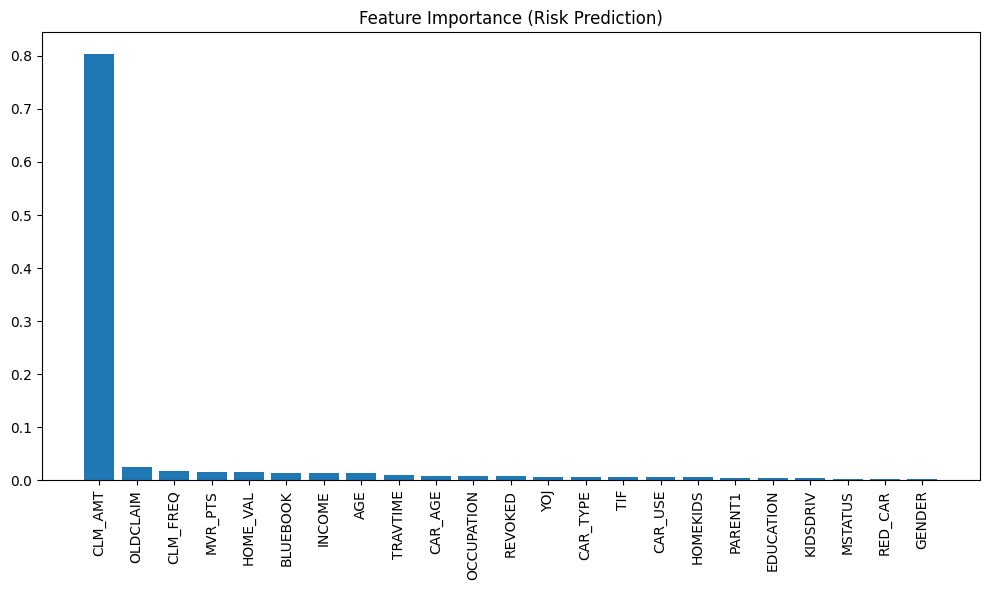

In [19]:
#Feature importance for risk prediction
importances_risk = rf_model.feature_importances_
indices_risk = np.argsort(importances_risk)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Risk Prediction)")
plt.bar(range(X_risk.shape[1]), importances_risk[indices_risk], align="center")
plt.xticks(range(X_risk.shape[1]), X_risk.columns[indices_risk], rotation=90)
plt.tight_layout()
plt.show()

* The feature importance chart for the risk prediction model shows that CLM_AMT (claim amount) is the most critical feature, followed by OLDCLAIM (previous claims).
* This makes sense because the past claim behavior and claim amounts are direct indicators of a customer’s risk of filing future claims.

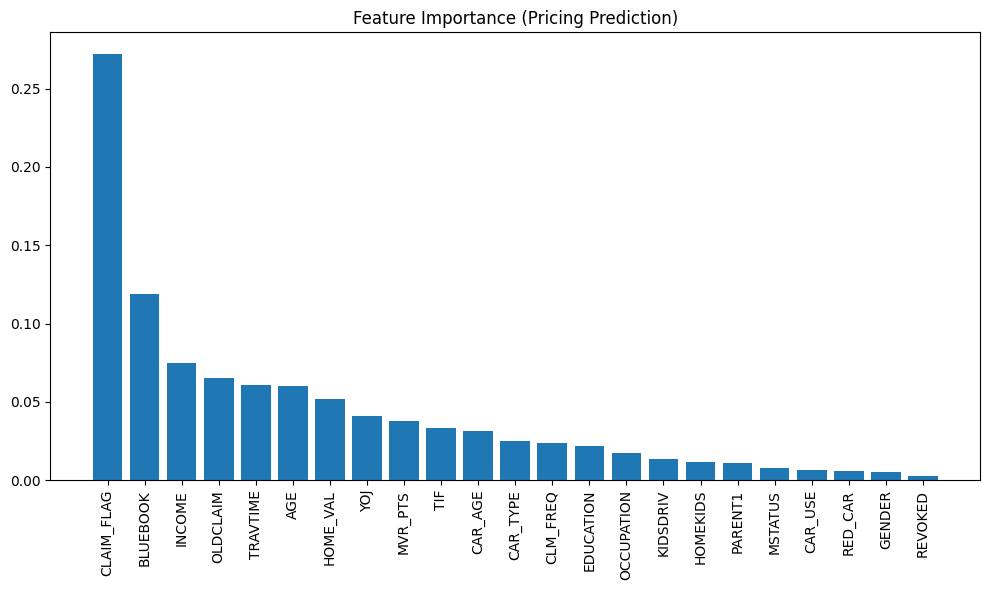

In [20]:
# Feature importance for pricing prediction
importances_pricing = rf_regressor.feature_importances_
indices_pricing = np.argsort(importances_pricing)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Pricing Prediction)")
plt.bar(range(X_pricing.shape[1]), importances_pricing[indices_pricing], align="center")
plt.xticks(range(X_pricing.shape[1]), X_pricing.columns[indices_pricing], rotation=90)
plt.tight_layout()
plt.show()

* CLAIM_FLAG is the most important feature, which makes sense because the model is using whether a claim was filed to predict the pricing.
* Other important features include BLUEBOOK, INCOME, OLDCLAIM, and TRAVTIME. These variables are reasonable indicators of vehicle value, income level, and previous claims—factors that should contribute to insurance pricing.

## Re-evaluating Feature Importance After Removing CLAIM_FLAG
We will re-evaluate the feature importance after removing CLAIM_FLAG from the pricing model and check which features are now contributing most to the predictions.

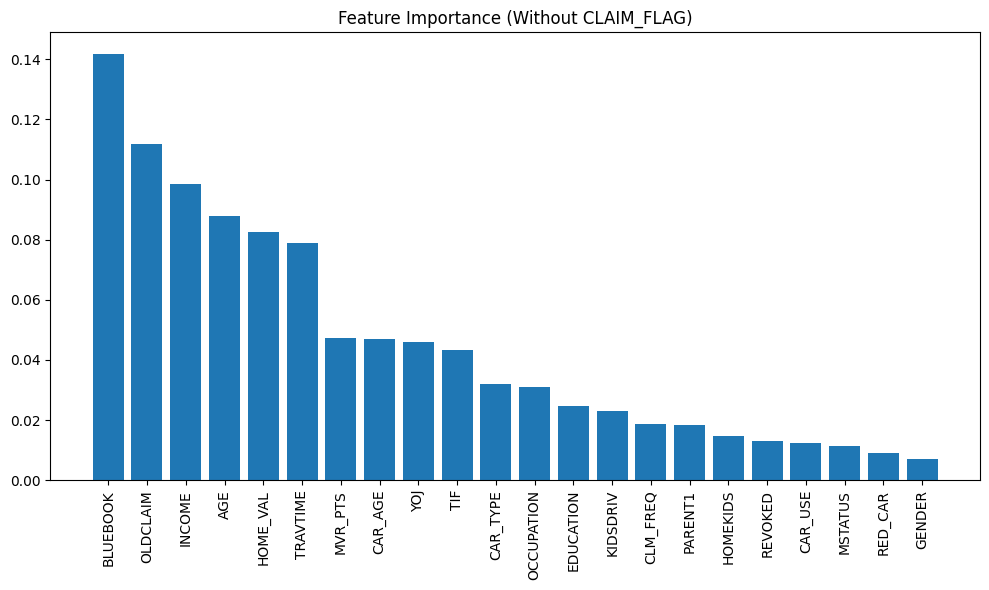

In [23]:
# Feature importance for the pricing model without CLAIM_FLAG
importances_pricing_cleaned = rf_regressor_cleaned.feature_importances_
indices_pricing_cleaned = np.argsort(importances_pricing_cleaned)[::-1]

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Without CLAIM_FLAG)")
plt.bar(range(X_pricing_cleaned.shape[1]), importances_pricing_cleaned[indices_pricing_cleaned], align="center")
plt.xticks(range(X_pricing_cleaned.shape[1]), X_pricing_cleaned.columns[indices_pricing_cleaned], rotation=90)
plt.tight_layout()
plt.show()

#Pricing Optimization and Simulation

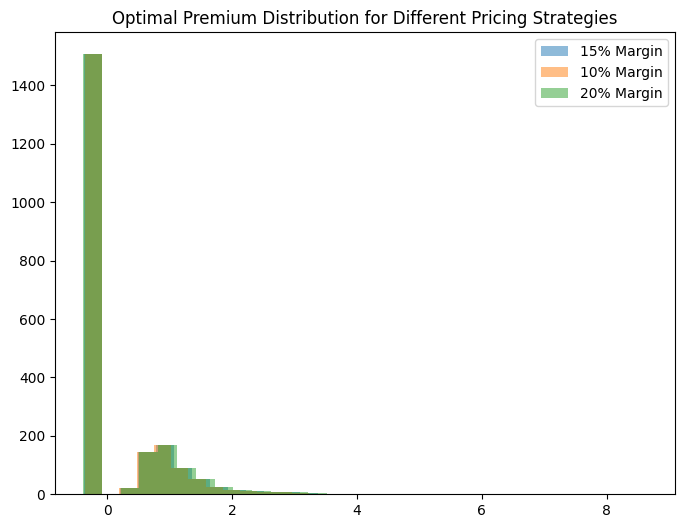

In [21]:
# Simulate different pricing strategies based on the predicted claim amount

# Define a basic profit margin (e.g., 15%)
profit_margin = 0.15

# Calculate the optimal premium using the predicted claim amount
optimal_premium = y_pred_pricing * (1 + profit_margin)

# Compare premiums for different profit margins
profit_margin_low = 0.10
profit_margin_high = 0.20

optimal_premium_low = y_pred_pricing * (1 + profit_margin_low)
optimal_premium_high = y_pred_pricing * (1 + profit_margin_high)

# Visualize the premium strategies
plt.figure(figsize=(8,6))
plt.hist(optimal_premium, bins=30, alpha=0.5, label='15% Margin')
plt.hist(optimal_premium_low, bins=30, alpha=0.5, label='10% Margin')
plt.hist(optimal_premium_high, bins=30, alpha=0.5, label='20% Margin')
plt.legend()
plt.title('Optimal Premium Distribution for Different Pricing Strategies')
plt.show()

* Most of the premiums cluster around the lower end, with very few outliers. This could suggest that most customers have relatively low risk profiles or claim histories.

# Customer Segmentation Using KMeans Clustering
Let's try segmenting the customers into different groups based on their features. This can help the business offer differentiated pricing or services.

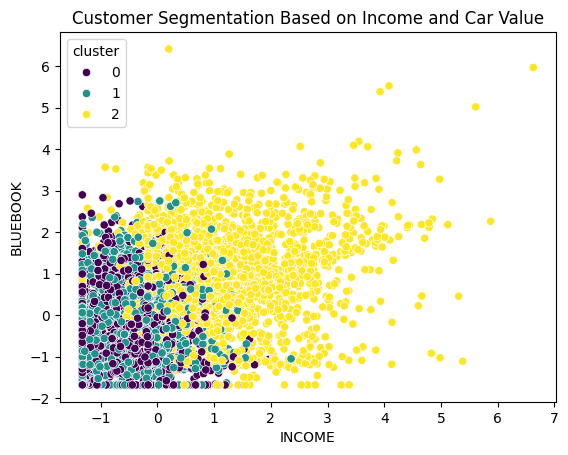

In [22]:
from sklearn.cluster import KMeans
import seaborn as sns

# Select features for clustering
clustering_features = df[['INCOME', 'CAR_AGE', 'TRAVTIME', 'BLUEBOOK', 'OLDCLAIM']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
sns.scatterplot(x='INCOME', y='BLUEBOOK', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation Based on Income and Car Value')
plt.show()

* The KMeans clustering has successfully grouped customers into three segments based on Income and Car Value (BLUEBOOK).
* Cluster Interpretation:
    * Cluster 0 (purple): Likely lower income and lower car value customers.
    * Cluster 1 (blue): Mid-level income and car value.
    * Cluster 2 (yellow): Higher-income customers with higher car values.

This segmentation could be useful for applying differentiated pricing strategies or targeted marketing campaigns for different customer groups.

### Applying Differentiated Pricing Based on Segmentation
We will now simulate applying different premium strategies to the customer segments obtained from KMeans clustering. Customers in Cluster 0 and Cluster 1 (lower income and car value) will get lower premiums, while those in Cluster 2 (higher income and car value) will get higher premiums.

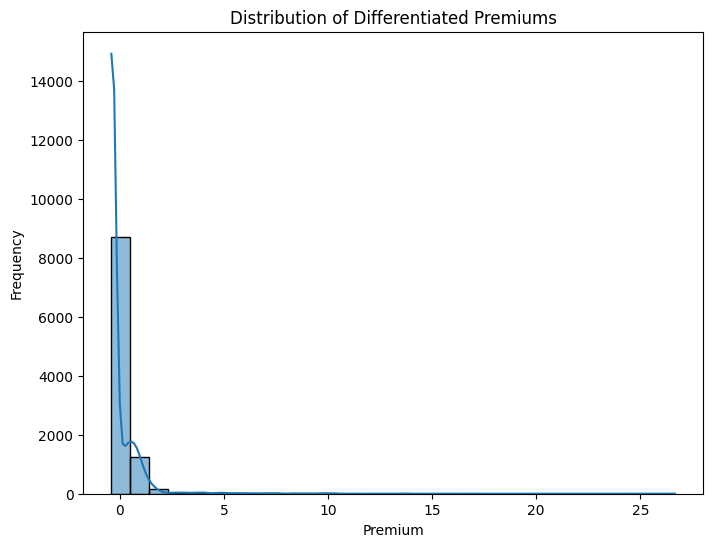

In [31]:
# Define a basic profit margin (e.g., 15%) for optimal premium calculation
profit_margin = 0.15

# Calculate the optimal premium using the predicted claim amount (you can use CLM_AMT or the predicted value from your pricing model)
df['optimal_premium'] = df['CLM_AMT'] * (1 + profit_margin)

# Now apply the differentiated premium strategy based on clusters
cluster_premium = {
    0: 0.90,  # Lower premium for Cluster 0
    1: 0.95,  # Slightly lower premium for Cluster 1
    2: 1.10   # Higher premium for Cluster 2
}

# Apply differentiated premiums based on clusters
df['differentiated_premium'] = df['cluster'].map(cluster_premium) * df['optimal_premium']

# Visualize the differentiated premium distribution
plt.figure(figsize=(8,6))
sns.histplot(df['differentiated_premium'], bins=30, kde=True)
plt.title('Distribution of Differentiated Premiums')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.show()

#### The distribution plot of the differentiated premiums shows that most of the premiums cluster around the lower end, with a long tail extending toward higher premiums. This indicates that the majority of customers are being charged relatively lower premiums, which likely correlates with their lower risk profiles or claim histories. A small number of customers are assigned higher premiums based on their higher risk factors (e.g., higher income or previous claims).

This differentiated premium model can be useful for real-world applications like:

* Personalized Pricing: Offering tailored premiums based on customer segments, improving customer satisfaction for low-risk customers while adequately charging high-risk individuals.
* Business Profitability: The model ensures that higher-risk individuals contribute more to the business's revenue, which can balance the profitability margin.